In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data set
df=pd.read_csv('/content/lung cancer.csv')
df



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Data preprocessing

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(309, 16)

In [ ]:
df.size

4944

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
print(df.GENDER.value_counts())

GENDER
M    162
F    147
Name: count, dtype: int64


In [ ]:
df.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.replace({"GENDER": {"M": 0, "F": 1}}, inplace = True)

In [ ]:
df.LUNG_CANCER.value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['target'] = le.fit_transform(df['LUNG_CANCER'])

df.drop(columns = "LUNG_CANCER", axis = 1, inplace = True)


In [ ]:
df['target'] =df['target'].apply(pd.to_numeric)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,target
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Splitting the Features and Target

In [ ]:
X=df.drop(columns='target',axis=1)
y=df['target']

In [ ]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
y

,target
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


<Axes: xlabel='target', ylabel='count'>

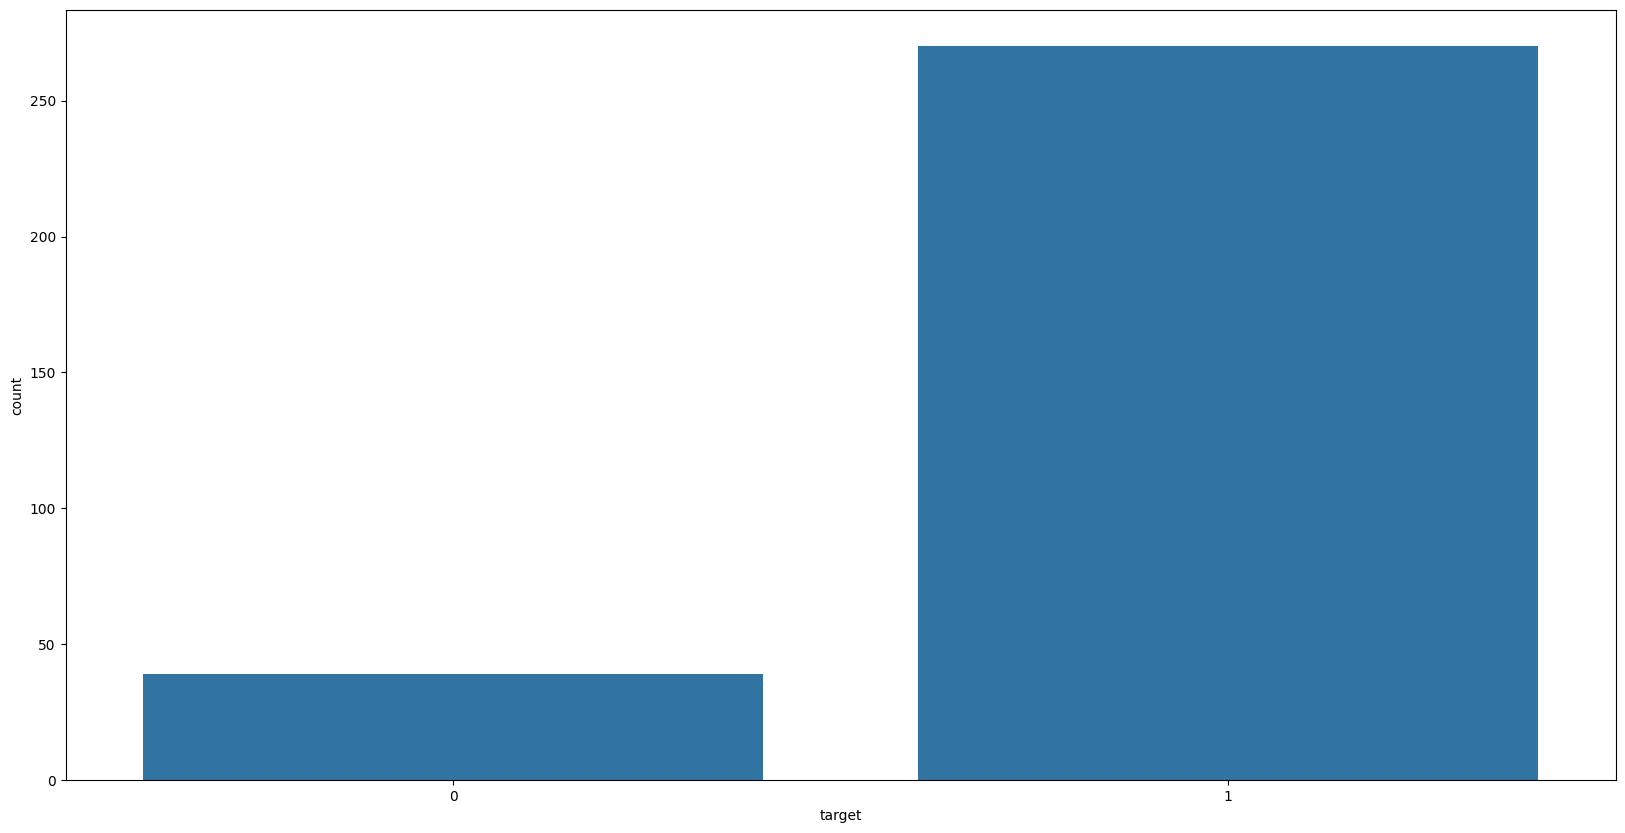

In [ ]:
sns.countplot(x = "target", data =df)

<Axes: ylabel='count'>

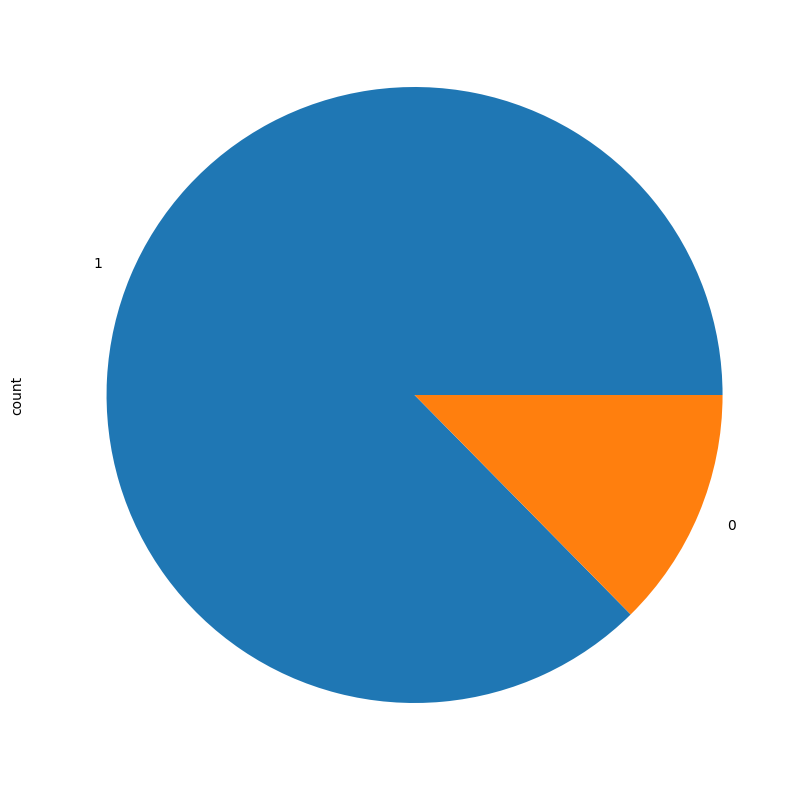

In [ ]:
df['target'].value_counts().plot(kind='pie')

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(309, 15) (247, 15) (62, 15)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Testing Accuracy:",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 93.52 %
Testing Accuracy: 87.1 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.88      0.98      0.93        53

    accuracy                           0.87        62
   macro avg       0.77      0.60      0.63        62
weighted avg       0.85      0.87      0.84        62

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  7],
       [ 1, 52]])

In [ ]:
#applying decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[Text(0.7004310344827587, 0.95, 'x[8] <= 1.5\ngini = 0.213\nsamples = 247\nvalue = [30, 217]'),
 Text(0.5387931034482759, 0.85, 'x[3] <= 1.5\ngini = 0.363\nsamples = 109\nvalue = [26, 83]'),
 Text(0.35344827586206895, 0.75, 'x[11] <= 1.5\ngini = 0.495\nsamples = 42\nvalue = [19, 23]'),
 Text(0.22413793103448276, 0.65, 'x[14] <= 1.5\ngini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(0.13793103448275862, 0.55, 'x[1] <= 60.5\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.06896551724137931, 0.45, 'x[7] <= 1.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.034482758620689655, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10344827586206896, 0.35, 'x[6] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.06896551724137931, 0.25, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.034482758620689655, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10344827586206896, 0.15, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1379310

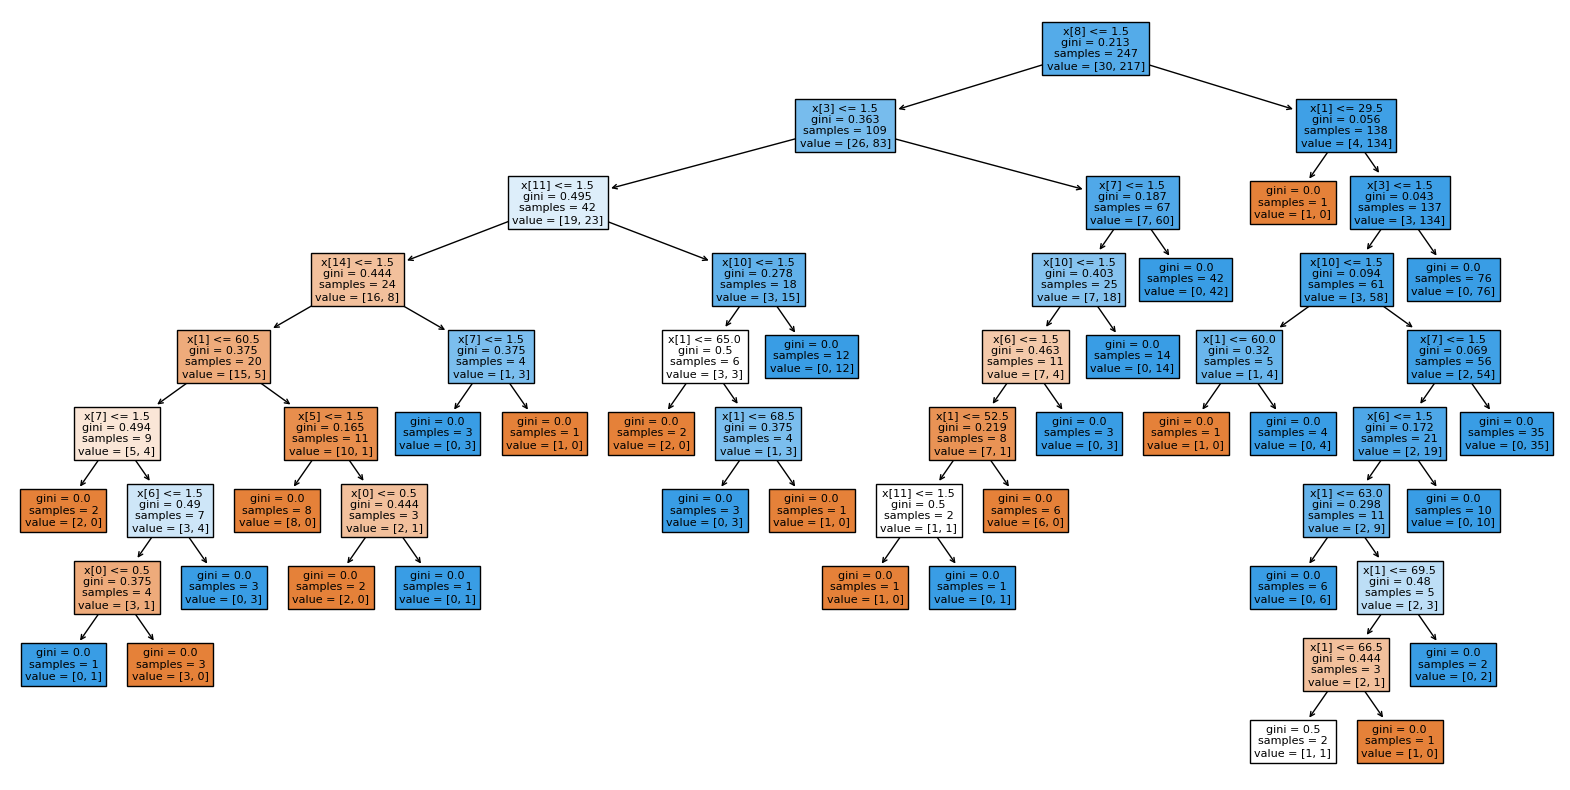

In [ ]:

from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
plot_tree(dt,filled=True)

In [ ]:
#applying classification _report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.91      0.96      0.94        53

    accuracy                           0.89        62
   macro avg       0.79      0.70      0.73        62
weighted avg       0.88      0.89      0.88        62



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9032258064516129

In [ ]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
svc=SVC()
lr=LogisticRegression()

In [ ]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8870967741935484

In [ ]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8548387096774194

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8709677419354839